In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

Our customer is "Some LLC Inc" (for example) Construction Company. The company is asking to create a model (program) that calculates the average price of houses in different areas of California when building their next house. <br>
Information provided to us: California census results. <br>
The data includes values such as population, median income, and median home prices for each area (called a block) of California. Each area has an estimated population of 600 to 3,000.<br>
So, our task is to create a model (program) that determines the median price of houses in different areas based on the above data.

<h1 style="padding:20px; background-color:green; display:inline-block">1.1 Understanding processes</h1> <br>
The first thing we do is gather more information about the project. It helps us to approach the project correctly, choose the right model, and determine what algorithms to use.<br>

For example, the first question is: Where is this model used? The client said that the output from our model, along with other, unknown data, would be fed back into the input of another model, and the final model would decide whether or not to invest in the specified area.
<br>
So our model is connected to a larger model.
<br>
Next question: What method is currently used by the buyer to determine the median price, and how accurate is the current method, and what are its disadvantages?
<br>
Answer: Currently, the prices for the area are determined manually based on the analysis of several experts. Accuracy 20%.
<br>
Now let's go to the next stage.

<h1 style="padding:20px; background-color:green; display:inline-block">1.2 Defining an analytical approach</h1> <br>
At this stage we can clarify a few things:
<br>

* Model: Supervised, Unsupervised, Reinforcement?
* Algorithm: classification, regression, or other type
* Method: Online or offline<br>

We will answer the above questions:
<br>

1.Supervised learning - because we have a label in the data. This is the median price in the area. We want to predict exactly this price.<br>
2.Regression - Did we say "prediction" (prognosis) is solved using regression algorithms<br>
3.Offline - because the data has already been given to us once. There is no constant data flow.<br>

How do we assess model accuracy?
<br>
There are different ways to estimate the accuracy, but for regression algorithms, Root Mean Square Error (RMSE) is often used: <br> <br>
<img src="https://i.imgur.com/aXL9iWa.png" /><br> <br>

Here:

* *m* - the number of rows in the dataset (each row is one piece of data)
* *x(i)* - vector of all parameters for row (except label)
* *y(i)* - label for row (median house price in our example)
* *X* - all parameters except label
* *h* - the prediction (hypothesis) returned from your model.
    * *h(x(i))* - the prediction returned by the model for the row.

**DataFrame**

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each line of the dataset is information about one area (neighbourhood, quarter, block). The dataset consists of 10 columns:

* *longitude* and *latitude* together are GPS coordinates
* *housing_median_age* - median age of houses
* *total_rooms* - total rooms available in this area
* *total_bedrooms* - total bedrooms available in this area
* *population* - population of the area
* *households* - the number of families in the area
* *median_income* - median income
* *median_house_values* - median price of houses
* *ocean_proximity* - how close the area is to the ocean

<h1 style="padding:20px; background-color:green; display:inline-block">2.1 Data analysis</h1> <br>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Conclusions from the above result:**

* The dataset consists of 20640 rows (each row is a separate area (block, neighborhood, quarter))
* The data in the *total_bedrooms* column is incomplete (20433 rows are complete, the remaining 207 have no data)
* All columns except the *ocean_proximity* column are numeric.

we see the ocean_proximity column:

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

So this column stores how far the houses are from the ocean as text.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Another way to analyze data is visualization**

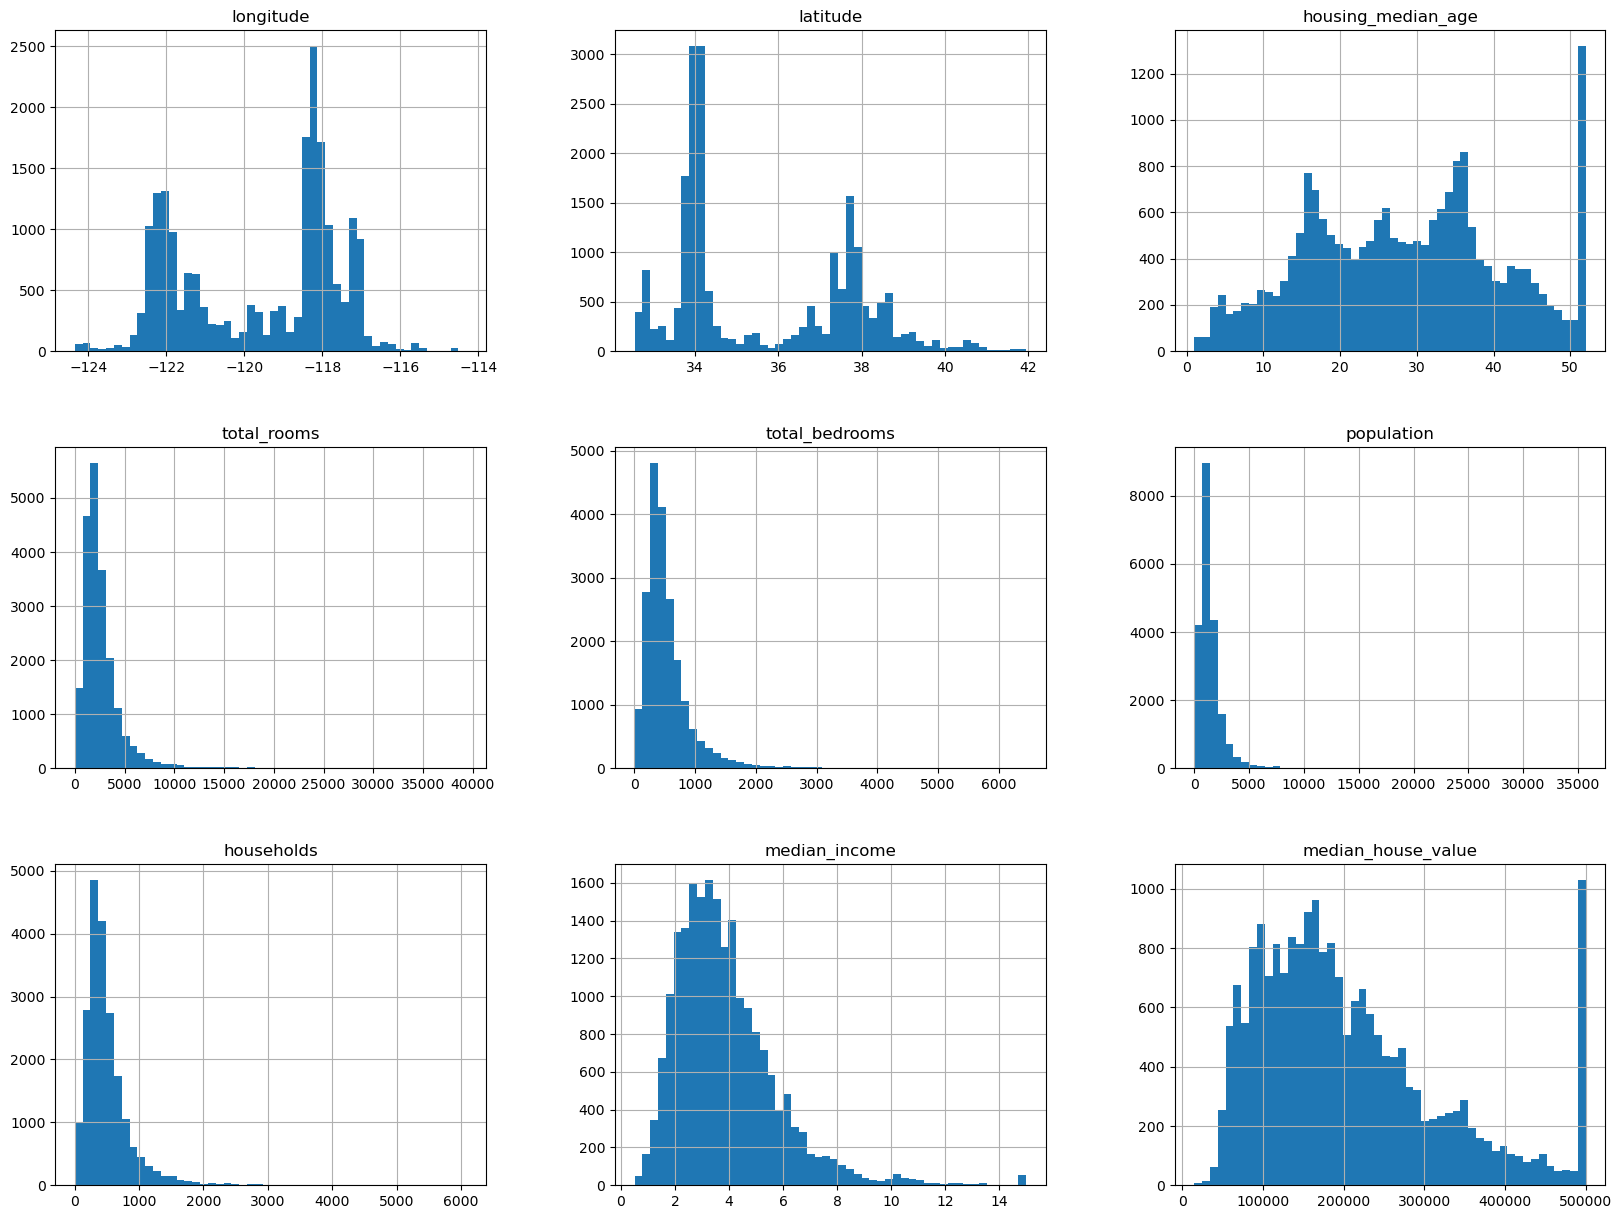

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

We continue the analysis:

1. *median_income* - the numbers in the column are unclear (what does a 1-digit number mean?). After talking to the customer, we know that the numbers are in thousand dollars (ie 4 is $4000).

2. In the *housing_median_age* (median age of houses) graph, 50-year-old houses suddenly exceeded one. We will clarify this with the client: when the data is compiled, all houses over 50 years old are included as 50 (there may be 60-70-100-year-old houses). That is, there is a limit to the data.

3. This is also the case with *median_house_value* (median price of houses), houses with a price of more than $500,000 are all written as 500,000. And this is not good for us. The reason is that the model we built cannot correctly estimate houses worth more than 500,000. 

There are 2 ways ahead of us:
* Data collection for expensive houses
* Excluding areas with houses worth more than 500,000 from the dataset.


The data distribution is skewed (not bell-shaped), preferably a normal distribution for ML (we'll see how to fix this later).

<img src="https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width="500"/>

**Drop values of housing_median_age more than 52**

In [7]:
df = df[df['housing_median_age'] < 52]

**Drop values of median_house_value more than 500_000**

In [8]:
df = df[df['median_house_value'] < 500_000]

**We analyze the data once again through visualization.**

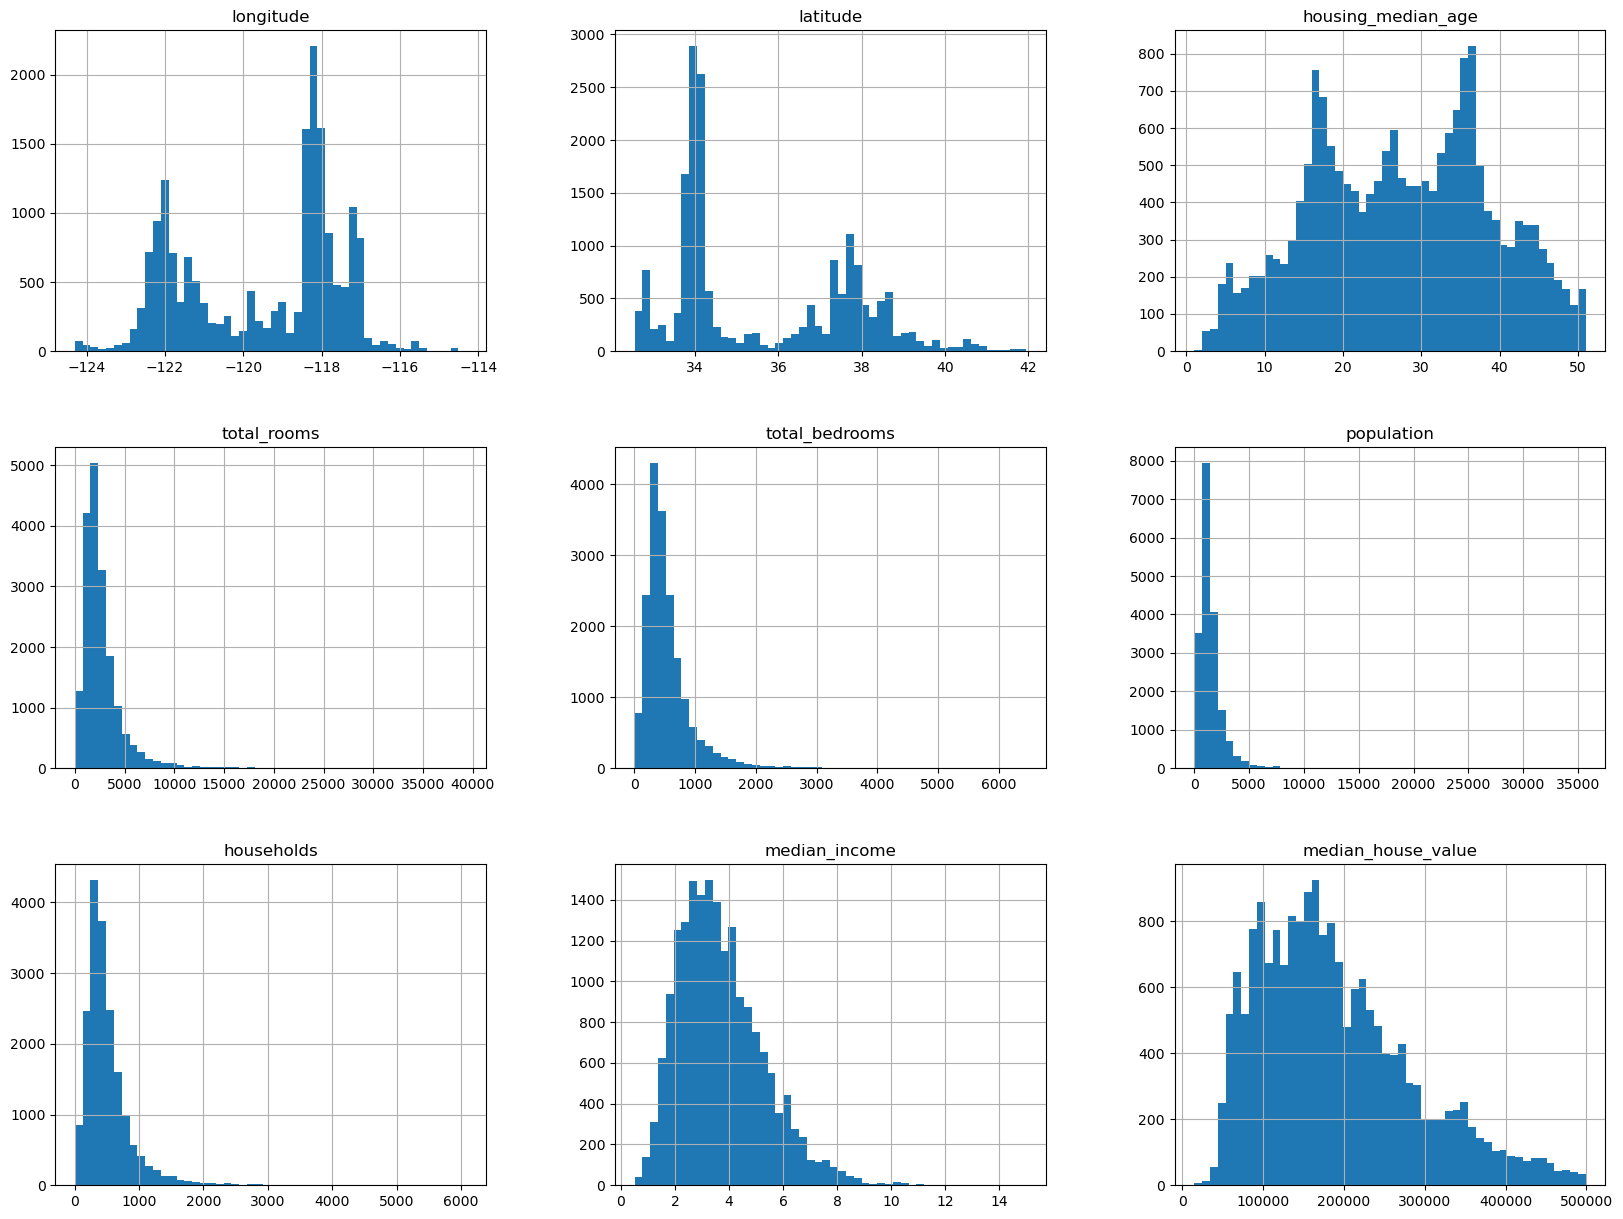

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18555 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18555 non-null  float64
 1   latitude            18555 non-null  float64
 2   housing_median_age  18555 non-null  float64
 3   total_rooms         18555 non-null  float64
 4   total_bedrooms      18362 non-null  float64
 5   population          18555 non-null  float64
 6   households          18555 non-null  float64
 7   median_income       18555 non-null  float64
 8   median_house_value  18555 non-null  float64
 9   ocean_proximity     18555 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h1 style="padding:20px; background-color:green; display:inline-block">2.2 Trains va Test set.</h1>

we divide the data into two parts
* Train set - to create a model
* Test set - to check the accuracy of the model

In fact, it may seem too early in the data analysis phase, but the goal here is to prevent not only the computer but also us from making the wrong conclusion.
<br>
We allocate *80%* of the data for training and *20%* for testing. For this, we refer to the ready-made *train_test_split* function in **scikit-learn.**

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train_set.shape

(14844, 10)

In [13]:
test_set.shape

(3711, 10)

A disadvantage of splitting using train_test_split is that the balance in the data can be lost. For example, if we look at the median_income column in our dataset, most of the population earns between **2000-4000$**.

Those who earn more than **8000** are very few. If we want to maintain this distribution in the train and test sets, we refer to the *StratifiedShuffleSplit* object.

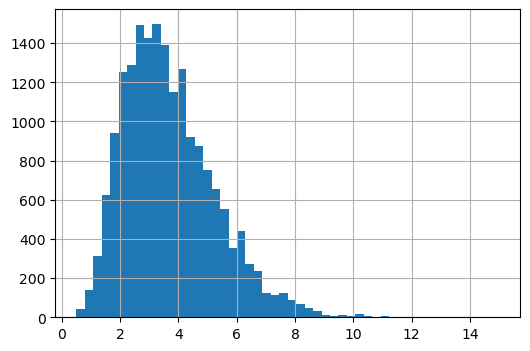

In [14]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(6,4))
plt.show()

Before using *StratifiedShuffleSplit*, we need to split the *median_income* column values into multiple categories. It is these categories that are passed to the split function in **StratifiedShuffleSplit**, and the function balances the train and test set based on these categories.

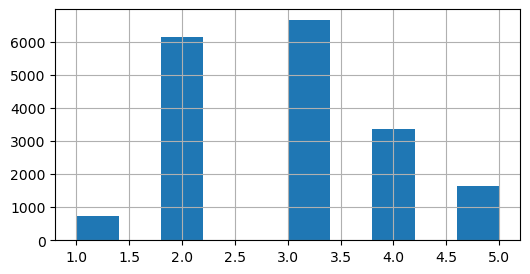

In [15]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1,2,3,4,5])
df['income_cat'].hist(figsize=(6,3))
plt.show()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

**The income_cat column is no longer needed, we delete it from the train and test sets.**

In [17]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16435,-121.26,38.09,35.0,930.0,186.0,525.0,201.0,2.0625,155000.0,INLAND
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000,224100.0,<1H OCEAN
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667,133900.0,<1H OCEAN
15923,-122.43,37.72,48.0,1289.0,280.0,782.0,235.0,3.6719,259800.0,NEAR BAY
1425,-122.04,37.97,10.0,974.0,316.0,631.0,286.0,2.3152,140600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,116800.0,INLAND
2135,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250,71500.0,INLAND
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,163900.0,<1H OCEAN
13828,-117.22,34.48,7.0,2449.0,447.0,1217.0,408.0,3.6646,109900.0,INLAND


we copy in our strat_train_set.

In [19]:
housing = strat_train_set.copy()

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16435,-121.26,38.09,35.0,930.0,186.0,525.0,201.0,2.0625,155000.0,INLAND
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000,224100.0,<1H OCEAN
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667,133900.0,<1H OCEAN
15923,-122.43,37.72,48.0,1289.0,280.0,782.0,235.0,3.6719,259800.0,NEAR BAY
1425,-122.04,37.97,10.0,974.0,316.0,631.0,286.0,2.3152,140600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,116800.0,INLAND
2135,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250,71500.0,INLAND
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,163900.0,<1H OCEAN
13828,-117.22,34.48,7.0,2449.0,447.0,1217.0,408.0,3.6646,109900.0,INLAND


<h1 style="padding:20px; background-color:green; display:inline-block">Visualization</h1> <br>

The most convenient way to analyze data is graphs. Let's start by looking at the geographical location of the houses.
<br>
For clarity, we also release a map of the state of California: <br>

<img src="https://www.nationsonline.org/maps/USA/California_map.jpg" width="400"/>

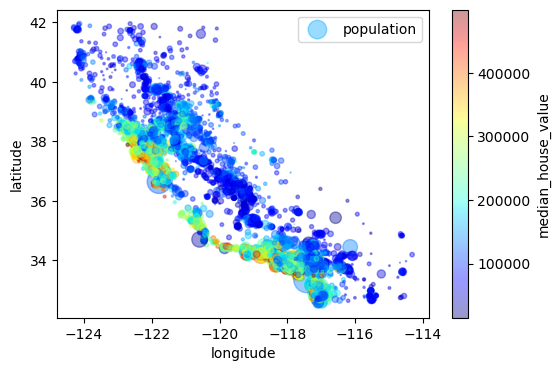

In [21]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(6,4),
    alpha=0.4,
    s=housing['population'] / 100,
    label = "population",
    c="median_house_value",
    cmap="jet",
    colorbar=True
)
plt.show()

What conclusions can we draw from the graph?

* Houses near the ocean are also more expensive.
* Areas near the ocean are more densely populated.

<h1 style="padding:20px; background-color:green; display:inline-block">Correlation</h1>
<h3>Our original goal is to find parameters that affect the price of the house among the data given to us. Correlation is very useful for us.</h3>
<h4>We can also plot the correlation values graphically using the pairplot function included in <i>seaborn</i>.</h4>

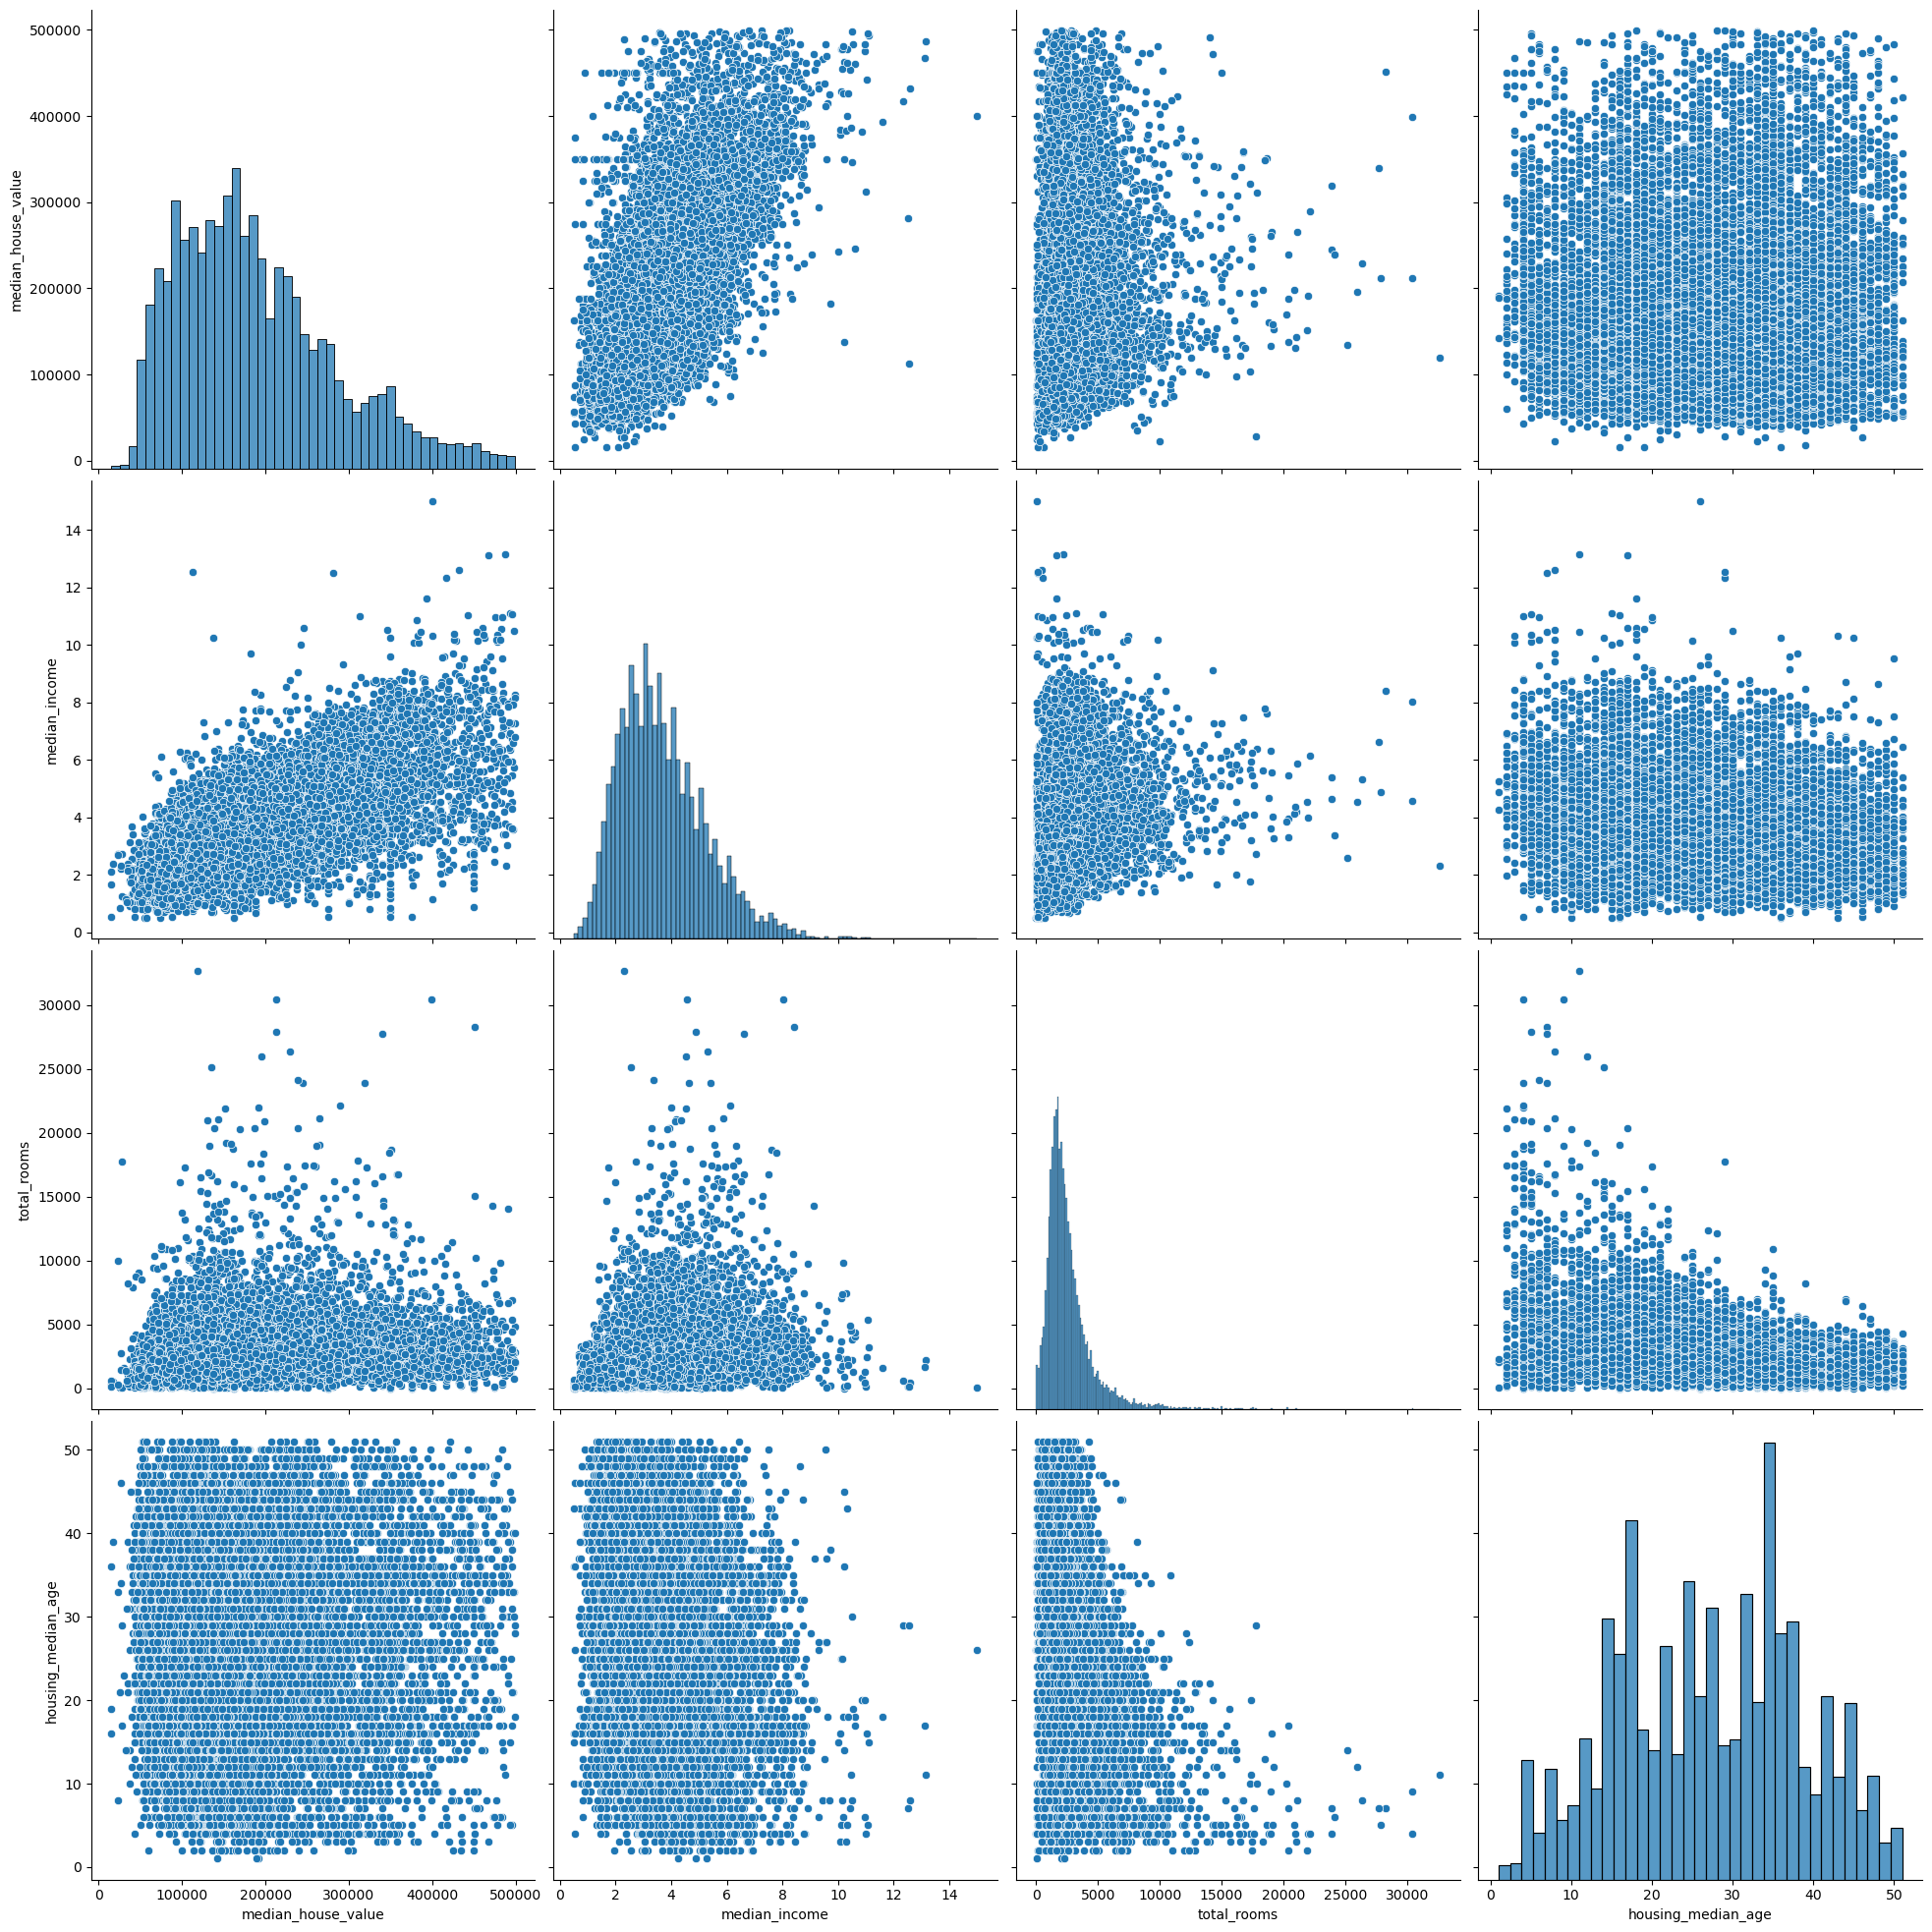

In [22]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[cols], height=5 )
# plt.figure(figsize=(6,4))
plt.show()

<h4>Since the correlation between median_income and house price is the strongest of all the columns, let's plot it separately.</h4>

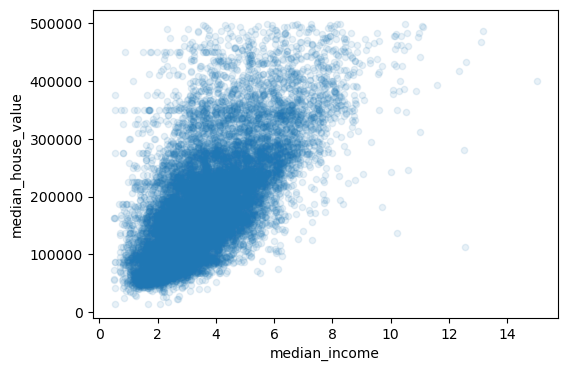

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(6,4))
plt.show()

This time we separate the median_house_value column (which we need to optimize) as well. This is because the changes applied to the rest of the columns are not applied to the label

In [24]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16435,-121.26,38.09,35.0,930.0,186.0,525.0,201.0,2.0625,155000.0,INLAND
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000,224100.0,<1H OCEAN
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667,133900.0,<1H OCEAN
15923,-122.43,37.72,48.0,1289.0,280.0,782.0,235.0,3.6719,259800.0,NEAR BAY
1425,-122.04,37.97,10.0,974.0,316.0,631.0,286.0,2.3152,140600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,116800.0,INLAND
2135,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250,71500.0,INLAND
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,163900.0,<1H OCEAN
13828,-117.22,34.48,7.0,2449.0,447.0,1217.0,408.0,3.6646,109900.0,INLAND


In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

<h1 style="padding:20px; background-color:green; display:inline-block">3.1 Data cleaning</h1>


In the dataset that came to us, the **total_bedrooms** column had *NaN* values, but in the future, when new data comes in, another column, say population, may have *NaN* values. We need to automate the data processing above, so our function should populate any *NaN* values in any column.

To calculate the median value for the dataset, we refer to the ***.fit()*** method inside the imputer object. Looking at the dataset columns, the last *ocean_proximity* column is not *numeric*. imputer works only with numerical values (no mean value exists for infinite values).

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

we separate the numerical columns:

In [27]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The calculated median values are stored in the *statistics_* attribute.

In [28]:
imputer.statistics_

array([-118.45  ,   34.24  ,   27.    , 2142.    ,  442.    , 1202.    ,
        416.    ,    3.4599])

Above we can see the median value for each column.

We call the **.transform()** function to populate the *NaN* values in the dataset with the calculated median values:

In [29]:
X = imputer.transform(housing_num)

The *.transform()* function returns a numpy array. Let's pass the array back to the dataframe:

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16435,-121.26,38.09,35.0,930.0,186.0,525.0,201.0,2.0625
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667
15923,-122.43,37.72,48.0,1289.0,280.0,782.0,235.0,3.6719
1425,-122.04,37.97,10.0,974.0,316.0,631.0,286.0,2.3152
...,...,...,...,...,...,...,...,...
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734
2135,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019
13828,-117.22,34.48,7.0,2449.0,447.0,1217.0,408.0,3.6646


<h1 style="padding:20px; background-color:green; display:inline-block">3.2 Changing the shape of text columns</h1>


The *ocean_proximity* column of our dataset is a text column. Let's break down this column to get started.

In [31]:
housing_cat = housing[['ocean_proximity']]

In [32]:
housing_cat['ocean_proximity'].head()

16435       INLAND
8492     <1H OCEAN
7184     <1H OCEAN
15923     NEAR BAY
1425      NEAR BAY
Name: ocean_proximity, dtype: object

ML algorithms work with **numbers**. So we need to change this column to numbers as well.

Using the **OneHotEncoder** - method, each unique value is converted into a separate column and **1** is placed in the corresponding column and **0** in the rest.

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot_arr = housing_cat_1hot.toarray()

<h3>Creating transform</h3>

We will add 2 new columns to the data: *rooms_per_household* and *bedrooms_per_room*.

Let's make a transformer that automatically adds these two columns to the given data.

For this, we create a new class inheriting from the **BaseEstimator** and **TransformerMixin** classes in sklearn and add the *fit()* and *transform()* methods to our class:

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [35]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[0,:]

array([-121.26, 38.09, 35.0, 930.0, 186.0, 525.0, 201.0, 2.0625, 'INLAND',
       4.626865671641791, 2.611940298507463, 0.2], dtype=object)

<h1 style="padding:20px; background-color:green; display:inline-block">3.4 Standard Scaler</h1>

Note that the range of values in our columns is different, for example:

* housing_median_age is between 0-50
* and total_rooms is in the range of 6-39000
* median_income - in the range of 0.5-15

All this will affect the correct operation of algorithms in future accounting books.

To avoid this, it is recommended to bring all the values in the column into one range.

For this, min-max scaling or standardization is used in ML. We choose standardization.

StandardScaler To standardize numbers, we need the mean (m) and standard deviation (s) for the given column. The value in each row is calculated as follows

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxeMnm1BSa8qyNkCB6wqiYa790XtNxCdM48k_be-9zESUvivv_nuY6SXk8fpJK_psGiA&usqp=CAU" />

To perform the above task, sklearn has a special MinMaxScaler object. Let's try applying min-max scaling to our data:

In [36]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[-0.89433838,  1.16120161,  0.69747356, ..., -0.81652833,
        -0.79749816, -1.03877995],
       [ 0.60138366, -0.79044542, -0.00600091, ...,  0.54007972,
         0.35574283, -0.18665788],
       [ 0.66707416, -0.72523526,  1.48888234, ..., -0.74068239,
        -0.95005695, -1.09981419],
       ...,
       [ 0.78834892, -0.81373477, -0.18186952, ...,  0.14964551,
        -0.58546731,  0.32423311],
       [ 1.14712008, -0.52028903, -1.76468708, ..., -0.22010344,
        -0.26224954, -0.01808106],
       [ 0.26787807, -0.0917651 , -0.00600091, ..., -0.17356162,
        -0.21312044, -0.08956375]])

In [37]:
housing_onehot = pd.get_dummies(housing['ocean_proximity'])
housing_onehot

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
16435,0,1,0,0
8492,1,0,0,0
7184,1,0,0,0
15923,0,0,1,0
1425,0,0,1,0
...,...,...,...,...
16543,0,1,0,0
2135,0,1,0,0
11132,1,0,0,0
13828,0,1,0,0


<h1 style="padding:20px; background-color:green; display:inline-block">4. Data preparation for ML</h1>
<h4>Pipeline</h4>
We divide the conveyor into 2 parts:

* Handling numeric columns
* Handling text columns

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room = True)),
          ('std_scaler', StandardScaler())             
])

We call the .fit_transform() method to run the pipeline.

In [39]:
num_pipeline.fit_transform(housing_num)

array([[-0.89433838,  1.16120161,  0.69747356, ..., -0.31979009,
        -0.044129  , -0.23759432],
       [ 0.60138366, -0.79044542, -0.00600091, ..., -0.14272065,
         0.00818645,  0.30773704],
       [ 0.66707416, -0.72523526,  1.48888234, ..., -0.21950859,
         0.09694474,  0.16125699],
       ...,
       [ 0.78834892, -0.81373477, -0.18186952, ..., -0.73939339,
         0.22100583,  1.08632879],
       [ 1.14712008, -0.52028903, -1.76468708, ...,  0.25658931,
        -0.01343936, -0.524299  ],
       [ 0.26787807, -0.0917651 , -0.00600091, ...,  0.16822839,
        -0.01395752, -0.86514212]])

Conveyor processing number columns is ready, what about text columns?

For this, we refer to the special **ColumnTransformer** object, which is also a pipeline view. Inside the **ColumnTransformer** we will also add the num_ipeline created above.

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

Here is the final, complete pipeline (full_pipeline).

Just call the .fit_transform() method to start the pipeline.

In [41]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16435,-121.26,38.09,35.0,930.0,186.0,525.0,201.0,2.0625,INLAND
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000,<1H OCEAN
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667,<1H OCEAN
15923,-122.43,37.72,48.0,1289.0,280.0,782.0,235.0,3.6719,NEAR BAY
1425,-122.04,37.97,10.0,974.0,316.0,631.0,286.0,2.3152,NEAR BAY
...,...,...,...,...,...,...,...,...,...
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,INLAND
2135,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250,INLAND
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,<1H OCEAN
13828,-117.22,34.48,7.0,2449.0,447.0,1217.0,408.0,3.6646,INLAND


In [42]:
housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
housing_prepared[0:5,:]

array([[-0.89433838,  1.16120161,  0.69747356, -0.79945798, -0.85338106,
        -0.81652833, -0.79749816, -1.03877995, -0.31979009, -0.044129  ,
        -0.23759432,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.60138366, -0.79044542, -0.00600091,  0.27529479,  0.50633617,
         0.54007972,  0.35574283, -0.18665788, -0.14272065,  0.00818645,
         0.30773704,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.66707416, -0.72523526,  1.48888234, -0.90937065, -0.92656028,
        -0.74068239, -0.95005695, -1.09981419, -0.21950859,  0.09694474,
         0.16125699,  1.        ,  0.        ,  0.        ,  0.        ],
       [-1.48555283,  0.98886047,  1.84061957, -0.63435903, -0.63148276,
        -0.59502371, -0.70958293, -0.01343022,  0.03981848,  0.01509182,
         0.04494561,  0.        ,  0.        ,  1.        ,  0.        ],
       [-1.28848135,  1.10530719, -1.50088415, -0.77922301, -0.54650043,
        -0.72516845, -0.57771008, -0.87778463, 

<h1 style="padding:20px; background-color:green; display:inline-block">5. Machine Learning</h1> <br>
Our goal is prediction, for which there are several ML algorithms.

<h3>Linear Regression</h3>
We create a new model from the LinearRegression class in sklearn.

In [44]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LinearRegression is an estimator. Estimators receive data and learn to fit them using the .fit() method (machine learning)

In [45]:
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

How can we test the model? Let's feed a row from the housing dataset to the model and compare the result with the existing result (label).

In [46]:
test_data = housing.sample(5)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,INLAND
4789,-118.32,34.02,47.0,1648.0,346.0,1120.0,338.0,2.0042,<1H OCEAN
12842,-121.40,38.66,50.0,880.0,150.0,1148.0,148.0,2.5062,INLAND
18150,-122.04,37.34,23.0,2590.0,725.0,1795.0,680.0,3.1600,<1H OCEAN
2912,-119.05,35.36,16.0,4507.0,1049.0,2261.0,959.0,3.3261,INLAND


In [47]:
test_label = housing_labels.loc[test_data.index]
test_label

1979     162500.0
4789     114200.0
12842    112500.0
18150    225000.0
2912     118400.0
Name: median_house_value, dtype: float64

In [48]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-2.98070808e-01,  1.49191030e+00,  6.09539253e-01,
        -3.12898959e-01, -8.61794939e-02, -1.23799043e+00,
        -1.27844620e+00,  5.93790376e-01,  5.32738707e+01,
        -6.16655929e-02,  6.98191502e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.91277432e-01, -7.34550996e-01,  1.75268526e+00,
        -4.69260080e-01, -4.75681825e-01, -3.03706355e-01,
        -4.43251490e-01, -1.07592292e+00, -2.15510238e-01,
         1.39292708e-02, -7.43393462e-02,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.65081989e-01,  1.42670014e+00,  2.01648819e+00,
        -8.22452259e-01, -9.38363382e-01, -2.79573556e-01,
        -9.34542493e-01, -7.56098411e-01,  2.32913321e-01,
         3.81568974e-01, -7.22291470e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.28848135e+00,  8.11861451e-01, -3.57738140e-01,
        -3.60477977e-02,  4.18993226e-01,  2.78066476

We predict:

In [49]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([431389.27403849, 148310.2761145 ,  79079.844529  , 217541.85802751,
       161400.28955925])

What you see above are the predicted values. Well, let's compare how they differ from real values:

In [50]:
pd.DataFrame({'Predicted price':predicted_data, 'Real price': test_label})

,Predicted price,Real price
1979,431389.274038,162500.0
4789,148310.276114,114200.0
12842,79079.844529,112500.0
18150,217541.858028,225000.0
2912,161400.289559,118400.0


<h1 style="padding:20px; background-color:green; display:inline-block">6. Let's evaluate the model</h1> <br>

As we can see, our model predicted with less error in some places, and more in some places. <br>
But 5 lines are not enough to evaluate the accuracy of the model. Let's test it using the test set we extracted earlier:

In [51]:
strat_test_set_new = strat_test_set[strat_test_set.ocean_proximity != 'ISLAND']


First let's extract the predictor columns (all columns except `median_house_value`) <br>
Second We extract the median_house_value column.

In [52]:

X_test = strat_test_set_new.drop('median_house_value', axis=1)

y_test = strat_test_set_new['median_house_value'].copy()
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13415,-117.42,34.06,27.0,2532.0,495.0,1305.0,436.0,2.9107,INLAND
14019,-117.16,32.74,21.0,1882.0,486.0,903.0,482.0,3.0600,NEAR OCEAN
14523,-117.12,32.90,14.0,3249.0,937.0,1929.0,838.0,2.8588,<1H OCEAN
19711,-121.65,39.16,16.0,5022.0,1103.0,2087.0,956.0,2.3963,INLAND
1703,-122.29,37.97,20.0,3426.0,632.0,1512.0,580.0,4.4911,NEAR BAY
...,...,...,...,...,...,...,...,...,...
14724,-117.01,32.80,17.0,1042.0,210.0,650.0,215.0,3.1000,<1H OCEAN
1284,-121.82,38.01,42.0,1017.0,253.0,798.0,266.0,2.1719,INLAND
3151,-118.61,34.99,11.0,4031.0,766.0,1539.0,564.0,3.8917,INLAND
1345,-121.90,38.00,14.0,1930.0,363.0,990.0,322.0,4.1094,INLAND


We also pass test_set through the pipeline:

In [53]:
X1_test = X_test[X_test.ocean_proximity != 'ISLAND']

In [54]:
X_test_prepared = full_pipeline.transform(X1_test)

Predict


In [55]:
y_predicted = LR_model.predict(X_test_prepared)

In [56]:
y_test

13415    143100.0
14019    243800.0
14523     92500.0
19711    114800.0
1703     227400.0
           ...   
14724     84200.0
1284      99100.0
3151     120800.0
1345     162200.0
7849     160700.0
Name: median_house_value, Length: 3709, dtype: float64

We use Root mean square error (RMSE) to compare prediction and real data:

In [57]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

57116.94002528958

In [58]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [59]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
lin_rmse

43486.25557169291

<h1 style="padding:20px; background-color:green; display:inline-block">Cross-Validation usuli bilan baholash</h1> <br>

Above, we split the data into test and train sets for model evaluation. The disadvantage of this method is that we always use the same data for testing and training.

With cross-validation, we can divide the data into several parts and train and test the model several times using different parts.

For cross validation, it is not necessary to divide the data into train and test, it is done by sklearn itself.

In [60]:
df1 = df[df["ocean_proximity"] != 'ISLAND']

In [61]:
X = df1.drop('median_house_value', axis=1)
y = df1["median_house_value"].copy()

X_prepared = full_pipeline.transform(X)

We can create a simple function to display the validation results

In [62]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

<h3>LogisticRegression</h3>

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

display_scores(LR_rmse_scores)

Scores: [65152.48608079 53840.57272892 72999.51711992 55225.3535552
 69725.87767586 56593.90872819 44866.58294602 65421.50122362
 69879.99636142 48464.31021761]
Mean: 60217.010663754656
Std.dev: 9225.475723692765


<h3>Random Forest</h3>

In [64]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [73360.7815327  45381.45218732 57362.54510203 51889.52849747
 56798.91940666 51893.26981193 42030.59173618 56866.3889543
 66800.57245302 44342.08690611]
Mean: 54672.61365877198
Std.dev: 9387.444052299543


<h1 style="padding:20px; background-color:green; display:inline-block">Cross-Validation usuli bilan baholash</h1> <br>

Save the model
We should save the model we created for future use. In general, it is desirable to store not only the model, but also other necessary variables. For example pipeline.

For this we use the pickle or joblib modules in Python.

preservation using a pickle

In [65]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

Let's read the model again:

In [66]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

Let's test the model

In [67]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [61332.96151699 57515.88099257 55085.08140076 57028.39807539
 55990.2760508 ]
Mean: 57390.51960730211
Std.dev: 2143.148293224897


<h1 style="padding:20px; background-color:green; display:inline-block">Thank you for your attention</h1> <br>